<div>
    <h1><center>Introduction</center></h1>
</div>

Safe and readily available water is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation can boost countries’ economic growth and contribute greatly to poverty reduction. Contaminated water and poor sanitation are linked to diseases such as cholera, diarrhoea, dysentery, hepatitis A, typhoid, and polio. Inadequate water and sanitation services in health care facilities expose patients and staff to additional risk of infection and disease. Globally, 15% of patients develop an infection during a hospital stay due to inadequate water and sanitation services.

With this project, my goal is to address Goal 6: Clean Water and Sanitation of the United Nations 17 Sustainable Development Goals. By utilizing the water quality dataset from Kaggle, I aim to classify water as potable or non-potable based on various factors.

---

<div>
    <h1><center>Feature Description</center></h1>
</div>

1. **ph**: pH of 1. water (0 to 14).

2. **Hardness**: Capacity of water to precipitate soap in mg/L.

3. **Solids**: Total dissolved solids in ppm.

4. **Chloramines**: Amount of Chloramines in ppm.

5. **Sulfate**: Amount of Sulfates dissolved in mg/L.

6. **Conductivity**: Electrical conductivity of water in μS/cm.

7. **Organic_carbon**: Amount of organic carbon in ppm.

8. **Trihalomethanes**: Amount of Trihalomethanes in μg/L.

9. **Turbidity**: Measure of light emiting property of water in NTU.

10. **Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

---

<div>
    <h1><center>Libraries</center></h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno
# Data Pre-processing Libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
#tensorflow components
import tensorflow as tf
from tensorflow import keras
# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

---

<div >
    <h1><center>Colors</center></h1>
</div>

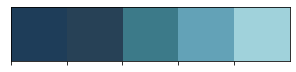

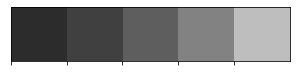

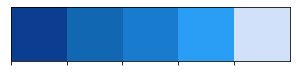

In [2]:
colors_pallete1 = ['#1E3D59', '#274156', '#3C7A89', '#63A2B7', '#A0D2DB'] 
colors_pallete2 = ['#2C2C2C', '#404040', '#5E5E5E', '#828282', '#BEBEBE'] 
colors_pallete3 = ['#0B3D91', '#1167B1', '#187BCD', '#2A9DF4', '#D0E1F9']
sns.palplot(colors_pallete1)
sns.palplot(colors_pallete2)
sns.palplot(colors_pallete3)

---

<div>
    <h1><center>Importing The Dataset</center></h1>
</div>

In [3]:
df=pd.read_csv('../input/water-potability/water_potability.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

---

<div>
    <h1><center>Visualizations</center></h1>
</div>

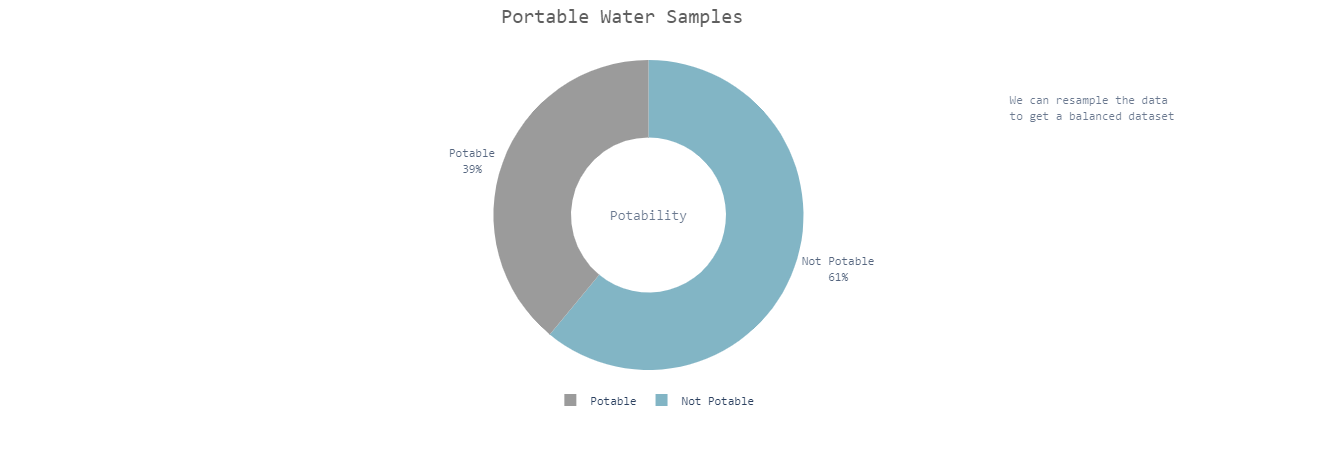

In [6]:
d= pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.5,opacity=0.8,
            color_discrete_sequence=[colors_pallete1[3],colors_pallete2[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Portable Water Samples',x=0.47,y=0.98,
               font=dict(color=colors_pallete2[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Feature Distribution

Hardenss of water: Water hardness is the amount of calcium and magnesium in water. Hard water can leave residue and require more soap to clean.

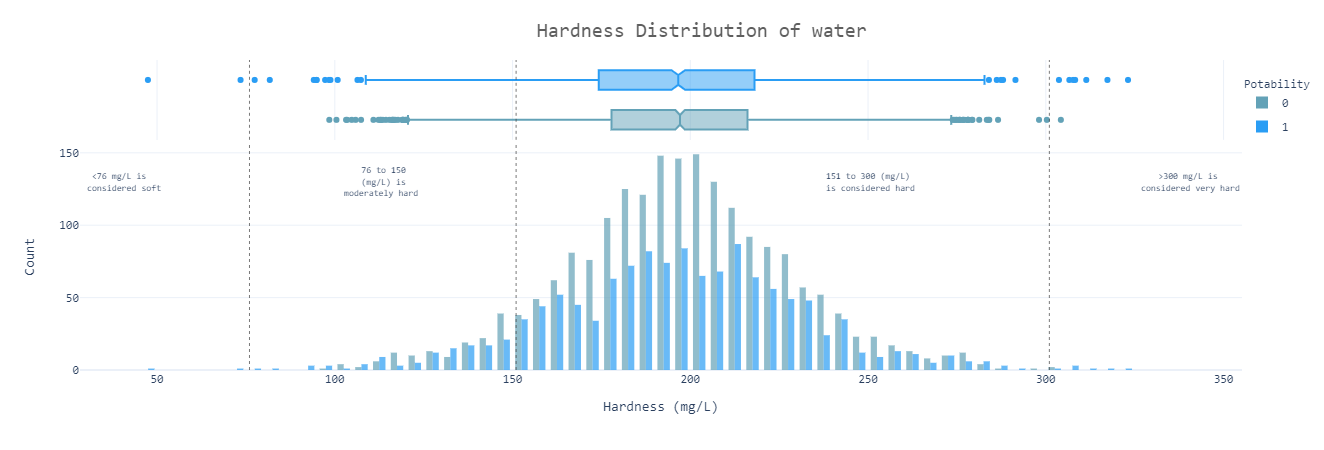

In [7]:
fig = px.histogram(df,x='Hardness',y=df['Hardness'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is <br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text=' 76 to 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='151 to 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution of water',x=0.53,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

pH measures the acid-base balance in water. Carbon dioxide concentration and temperature affect pH. Drinking water pH is usually between 6.5-8.5.

Received message. pH measures the acid-base balance in water. Carbon dioxide concentration and temperature affect pH. Drinking water pH is usually between 6.5-8.5.

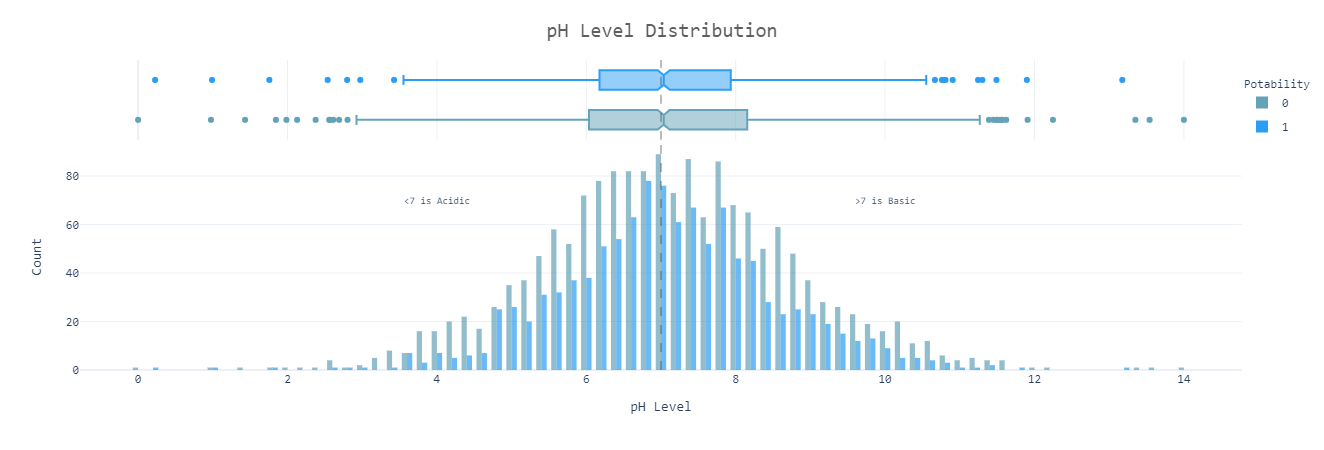

In [8]:
fig = px.histogram(df,x='ph',y=df['ph'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_pallete2[1],line_dash='dash',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

TDS measures the concentration of dissolved particles in water, including inorganic salts and other compounds.

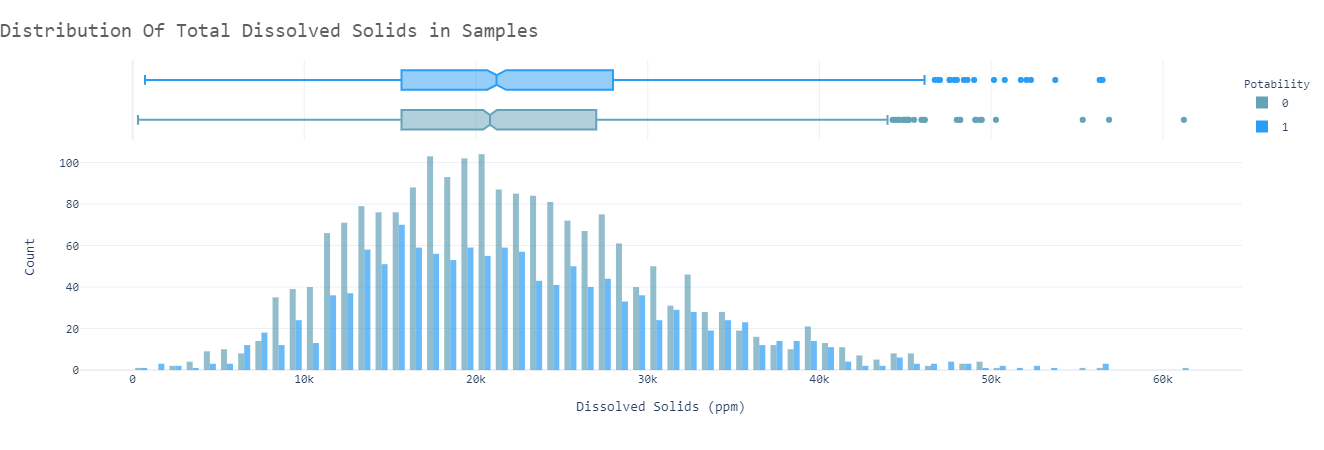

In [9]:
fig = px.histogram(df,x='Solids',y=df['Solids'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids in Samples',x=0,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Chloramines are disinfectants formed by adding ammonia to chlorine. They provide long-lasting disinfection and have been used since the 1930s.

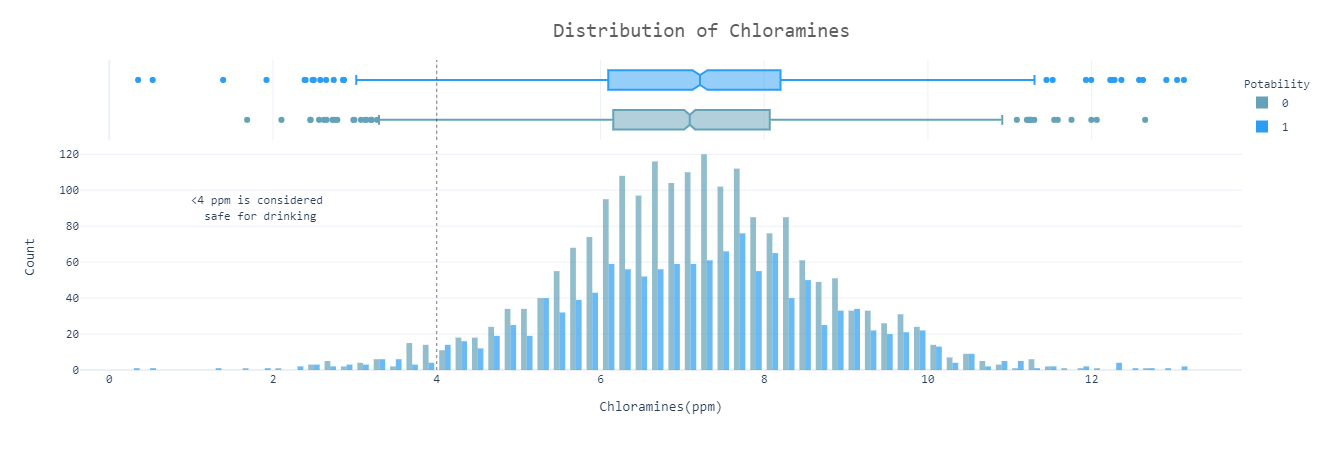

In [10]:
fig = px.histogram(df,x='Chloramines',y=df['Chloramines'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution of Chloramines',x=0.53,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Chloramines(ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Sulfate is found in almost all natural water and can have a laxative effect when combined with calcium and magnesium.

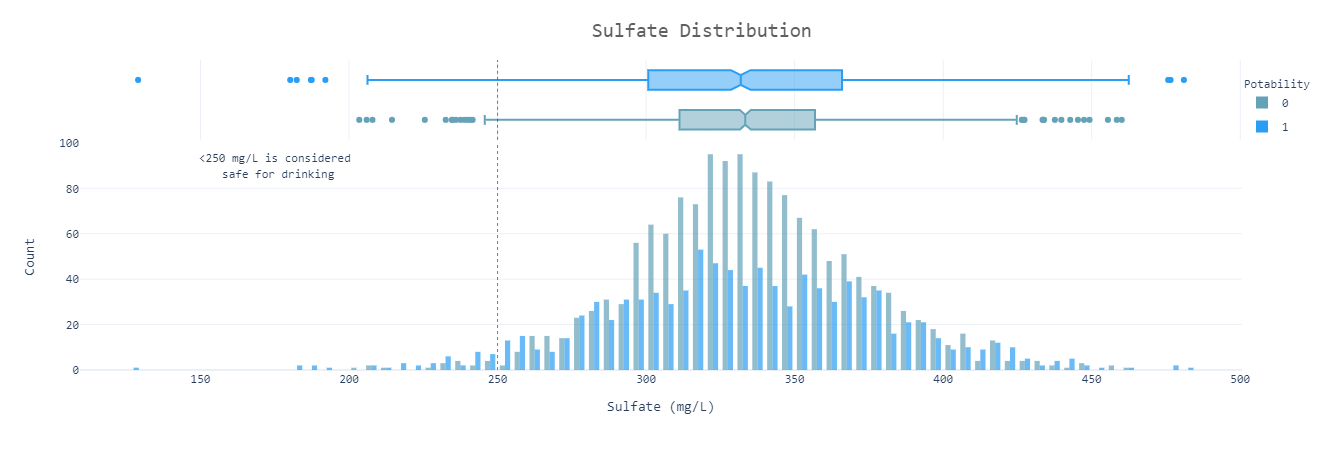

In [11]:
fig = px.histogram(df,x='Sulfate',y=df['Sulfate'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Conductivity measures water’s ability to conduct electricity. It increases with salinity and temperature but is low for organic compounds like oil.

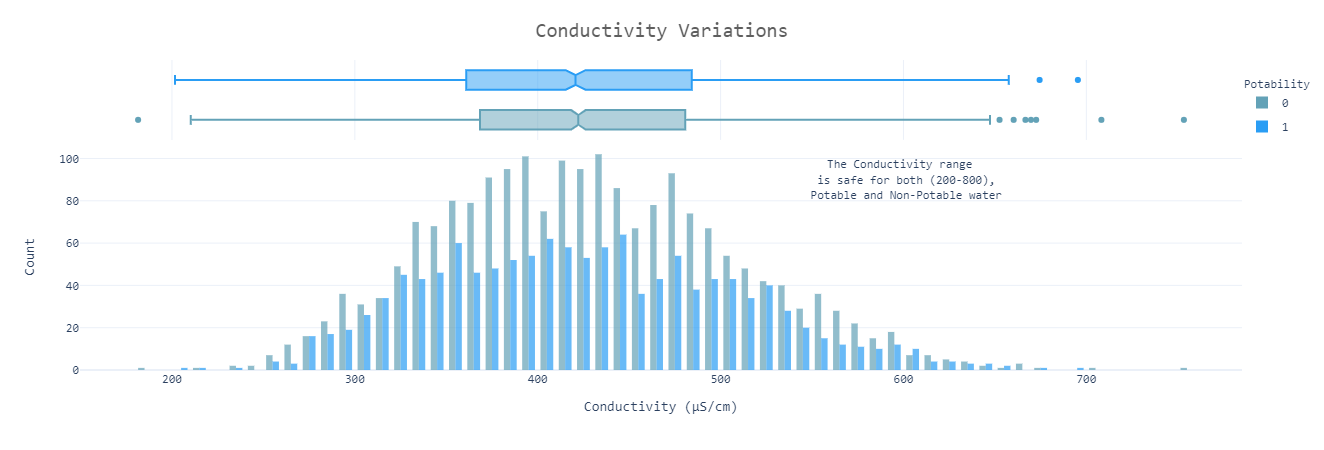

In [12]:
fig = px.histogram(df,x='Conductivity',y=df['Conductivity'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Variations',x=0.5,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Organic contaminants can enter waterways from rainfall runoff, wastewater, and industrial spills. Knowing the organic content in water is important.

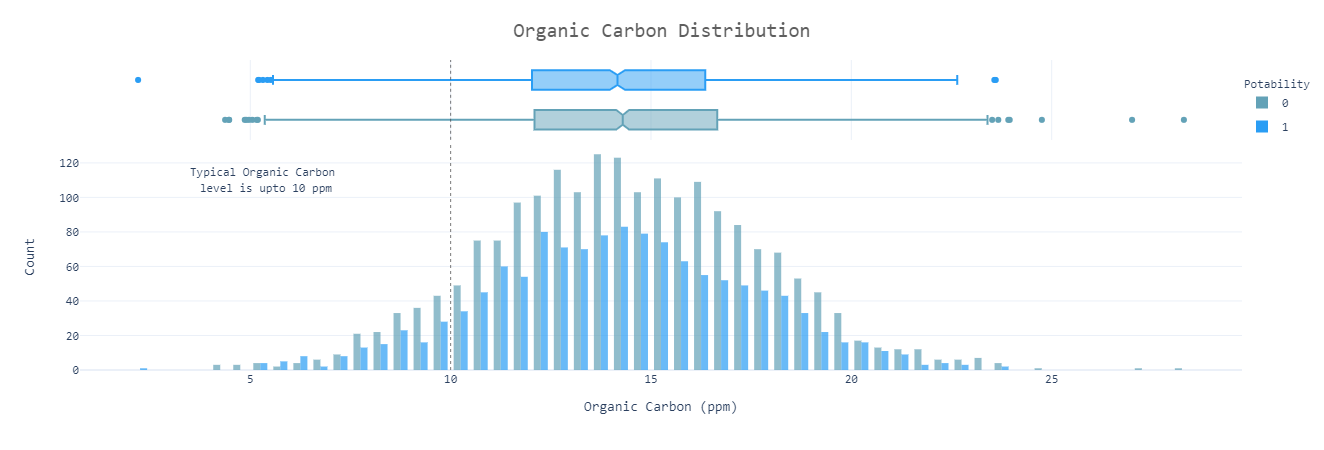

In [13]:
fig = px.histogram(df,x='Organic_carbon',y=df['Organic_carbon'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Trihalomethanes (THMs) are formed when chlorine reacts with organic matter in water. High levels of THMs can have negative health effects.

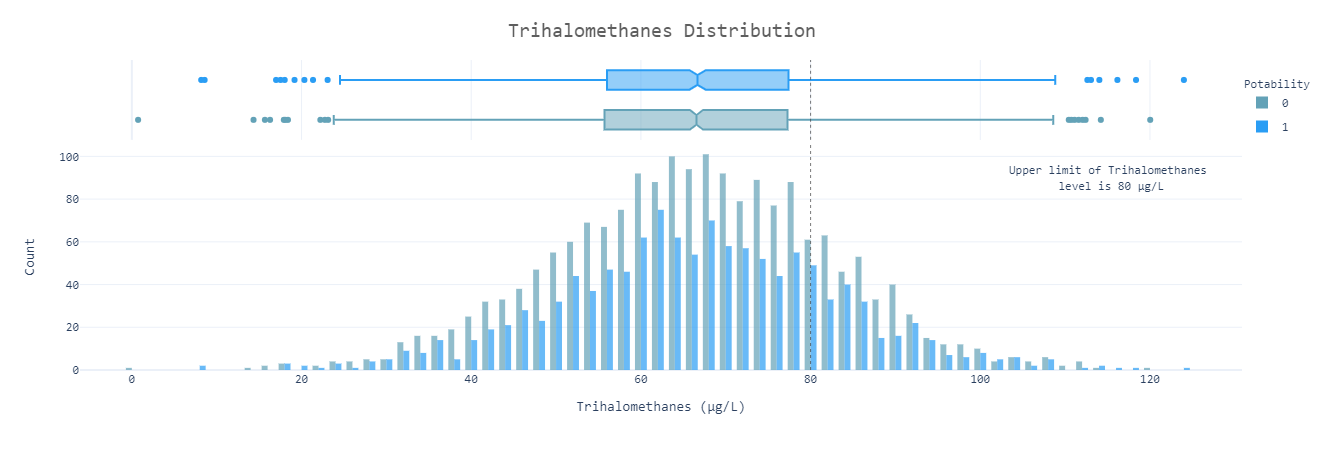

In [14]:
fig = px.histogram(df,x='Trihalomethanes',y=df['Trihalomethanes'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Turbidity measures water clarity. It is caused by material such as clay, silt, organic matter, and microscopic organisms that scatter light.

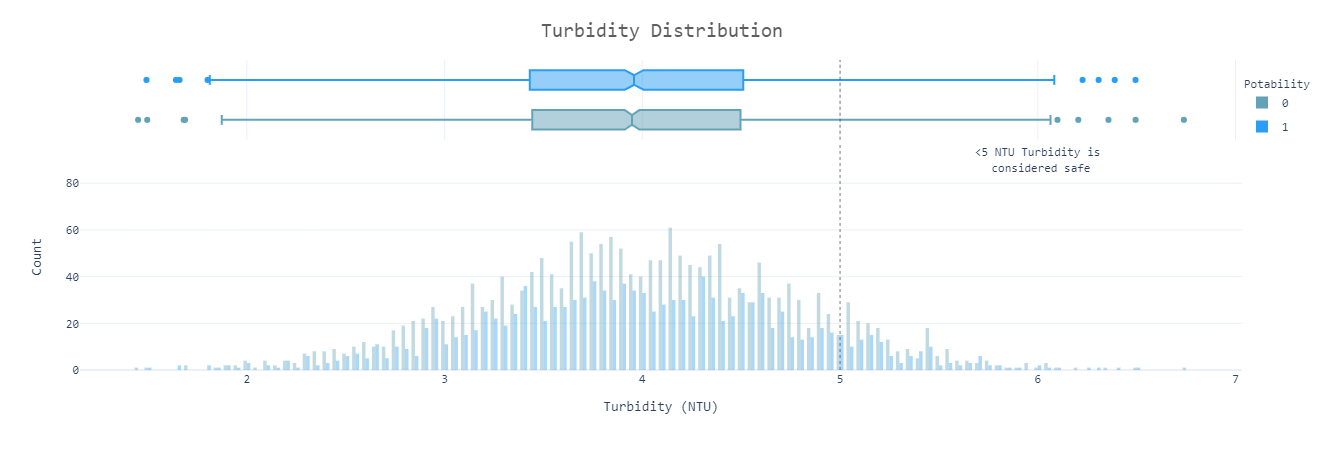

In [15]:
fig = px.histogram(df,x='Turbidity',y=df['Turbidity'],color='Potability',template='plotly_white',
                  marginal='box',opacity=0.4,nbins=200,color_discrete_sequence=[colors_pallete1[3],colors_pallete3[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_pallete2[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_pallete2[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_pallete2[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Let's use Scatter Plot to figure out correlation b/w all features

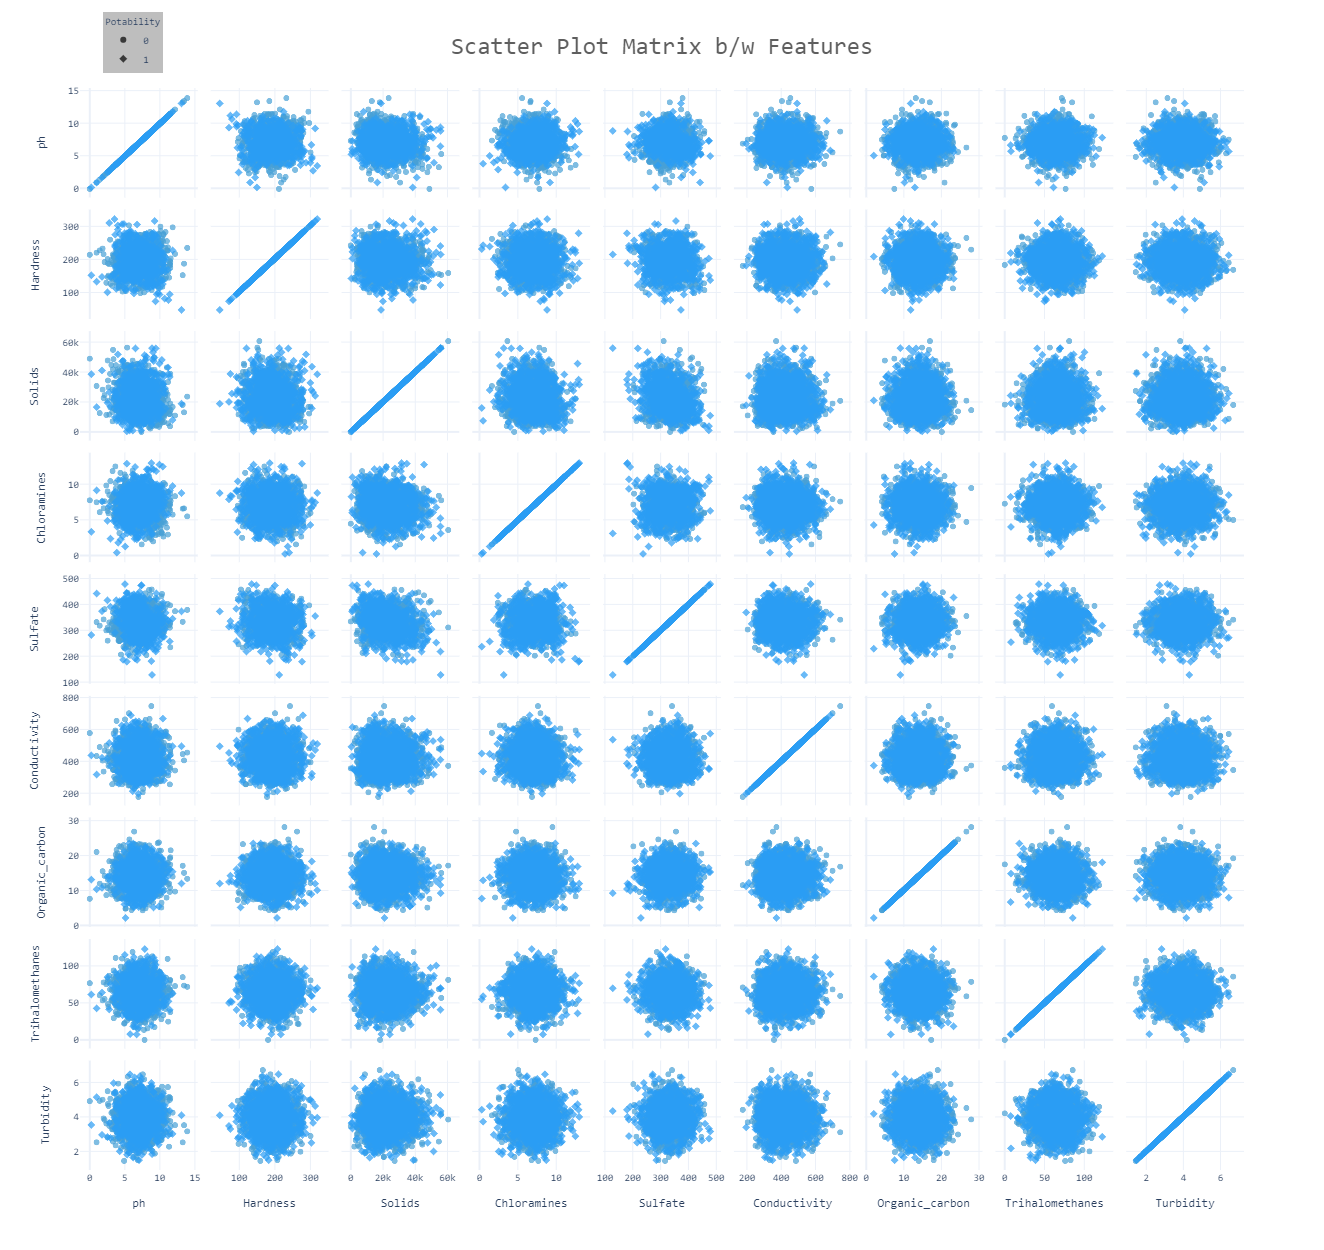

In [16]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_pallete3[3],colors_pallete1[3]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_pallete1[3],colors_pallete3[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_pallete2[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_pallete2[2],size=24)))
fig.show()

As we can see, there seems to be hardly any correlation b/w the features

In [17]:
cor=df.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

Let's visualise this with a heatmap!

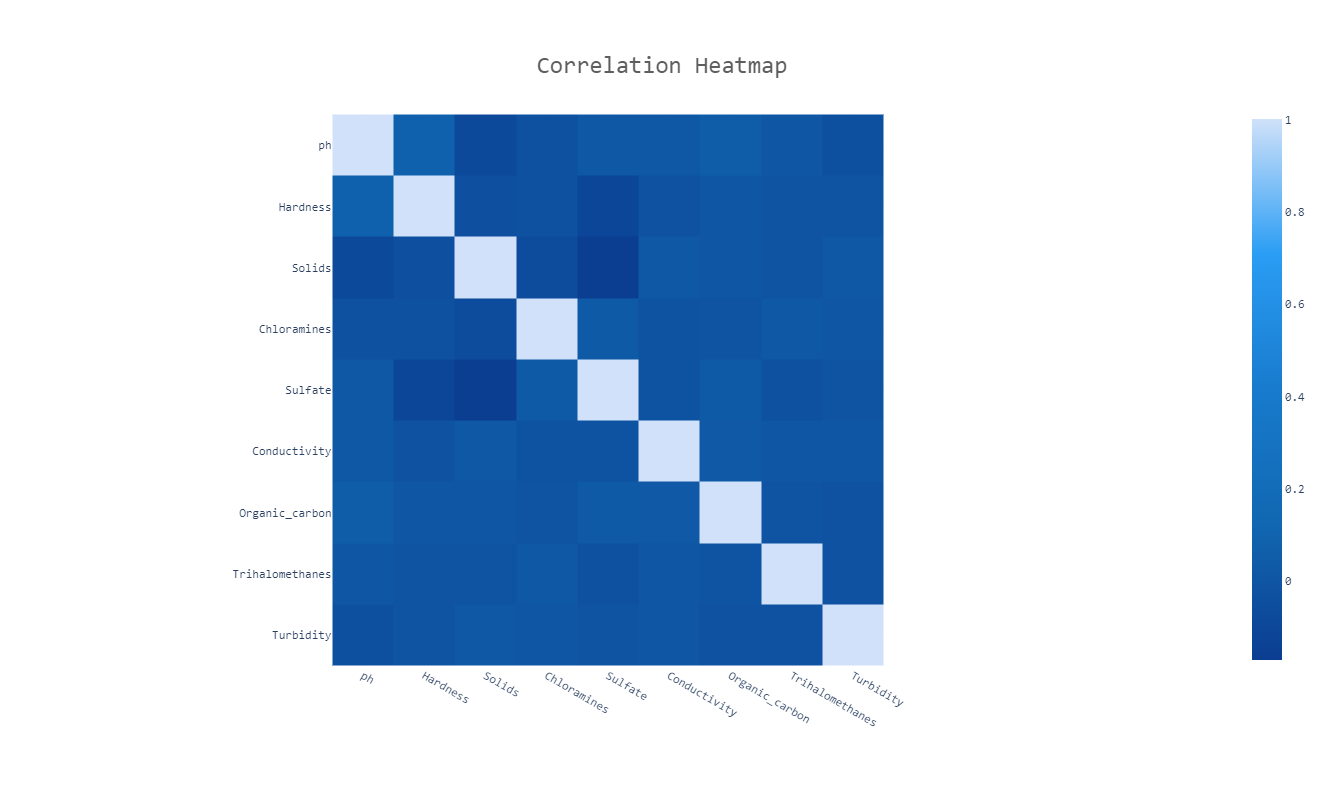

In [18]:
fig = px.imshow(cor,height=800,width=800,color_continuous_scale=colors_pallete3,template='plotly_white')

fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color=colors_pallete2[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

---

<div>
    <h1><center>Data Preparation</center></h1>
</div>

<div>
    <h3><center>Dealing With Missing Values</center></h3>
</div>

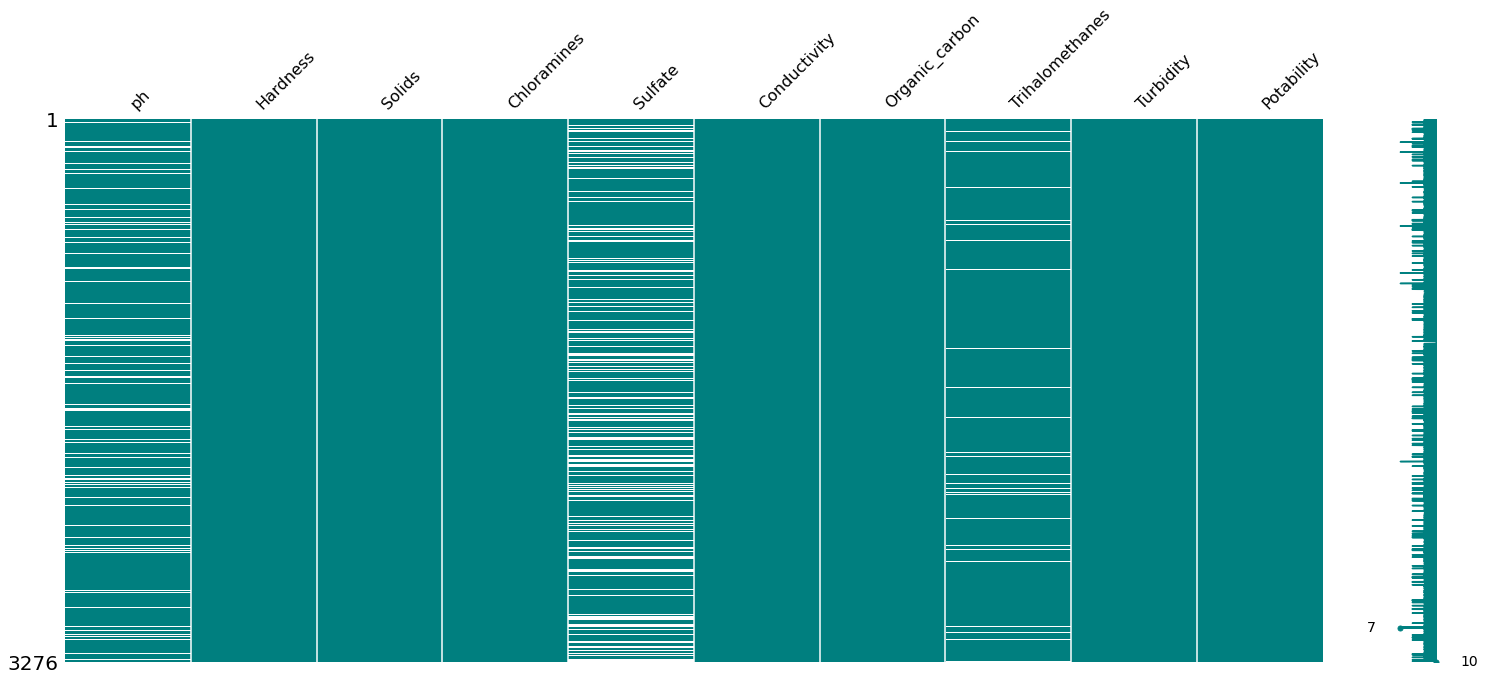

In [19]:
fig = msno.matrix(df,color=(0,0.5,0.5))

We can see that there are many missing values in the dataset,Let's fill them up!

In [20]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
df[df['Potability']==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [22]:
df[df['Potability']==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [23]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [24]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

Since there's hardly any difference in the mean values of water in potable and non potable water, we'll fill missing values with it

In [25]:
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [26]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<div>
    <h3><center>Standardizing The Data</center></h3>
</div>

In [27]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

---

<div>
    <h1><center>Modelling</center></h1>
</div>

<div >
    <h3><center>Neural Network</center></h3>
</div>

Here we'll be using a basic tensorflow model to help with classification

In [30]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Calculate the confusion matrix
y_pred = model.predict(X_test)
y_pred = tf.math.round(y_pred)
y_pred = y_pred.numpy()

Epoch 1/10
82/82 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.5655
Epoch 2/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6182
Epoch 3/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6122
Epoch 4/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6524
Epoch 5/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6607
Epoch 6/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6702
Epoch 7/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.6926
Epoch 8/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6594
Epoch 9/10
82/82 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.6606
Epoch 10/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6890


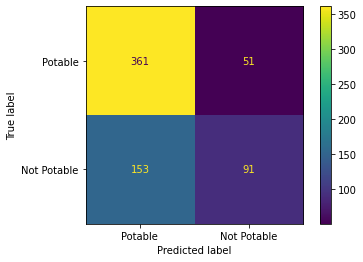

In [31]:
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
labels = ['Potable', 'Not Potable']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [32]:
print(f'Precision: {precision}')
print(f'Accuracy: {accuracy*100:.2f}%')

Precision: 0.6408450704225352
Accuracy: 68.90%


Clearly, the model cannot be trained further, any more training will lead to overfitting.This is mostly becausethe features aren't proving much help to the model to distinguish between the 2 classes which is stopping the model from performing better.

---

<div>
    <h1><center>Conclusions</center></h1>
</div>

1. The TDS levels appear to be inconsistent as their average values are 40 times higher than the safe upper limit for drinking water.
2. The data contains a nearly equal distribution of water samples with acidic and basic pH levels.
3. A significant majority (92%) of the water samples were classified as hard.
4. Only a small fraction (2%) of the water samples met the safety standards for Chloramines levels.
5. Similarly, only 1.8% of the water samples met the safety standards for Sulfate levels.
6. A vast majority (90.6%) of the water samples had Carbon levels that exceeded the typical levels found in drinking water (10 ppm).
7. In contrast, a considerable majority (76.6%) of the water samples met the safety standards for Trihalomethane levels.
8. Additionally, a large majority (90.4%) of the water samples met the safety standards for Turbidity.
9. The correlation coefficients between the features were found to be very low.
10. The Model could only reach 68% accuracy, with the confusion matrix indicating the model fails to identify potable water, this could be mostly attributed to data imbalance.


---